# Ejercicio con scikit-learn

Crea 1000 muestras en un espacio tetradimensional con [make_blobs](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) agrupadas alrededor de 3 centros, clasifícalas utilizando k-means y dibuja el resultado utilizando un PCA en el que los colores se correspondan con la realidad y las formas con la predicción.

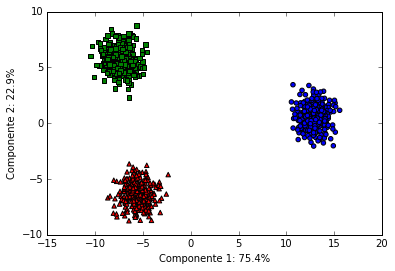

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import decomposition

# creamos los datos
n_muestras = 1000
n_dims = 4
n_grupos = 3
datos, clases = make_blobs(n_samples=n_muestras, n_features=n_dims, centers=n_grupos)

# Agrupamos con K-means
agrupacion = KMeans(n_clusters=n_grupos, random_state=0).fit(datos)
clases_predichas = agrupacion.labels_

# Hacemos el PCA
pca = decomposition.PCA(n_components=2)
pca.fit(datos)
proyeccion = pca.transform(datos)
varianza_explicada = pca.explained_variance_ratio_

# Dibujamos el resultado
formas = 's', 'o', '^'
colores = 'red', 'green', 'blue'
for grupo_predicho in range(n_grupos):
    muestras_grupo_predicho = clases_predichas == grupo_predicho
    colores_muestras = [colores[clase_real] for clase_real in clases[muestras_grupo_predicho]]
    plt.scatter(proyeccion[muestras_grupo_predicho, 0], proyeccion[muestras_grupo_predicho, 1],
                c=colores_muestras,
                marker=formas[grupo_predicho])
plt.xlabel('Componente 1: {:.1f}%'.format(varianza_explicada[0] * 100))
plt.ylabel('Componente 2: {:.1f}%'.format(varianza_explicada[1] * 100))
